# Visualize Intermediate Activations

In [14]:
import os, shutil
#directory to load dataset from
original_dataset_dir = 'kaggle/train'
#where to store training pics
base_dir = 'cats_and_dogs_small'

os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
#directory for dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
#directofy for cats
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#validation directories
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
#test directories
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

OSError: [Errno 17] File exists: 'cats_and_dogs_small'

In [15]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

NameError: name 'train_cats_dir' is not defined

In [63]:
from keras import layers
from keras import models
cd_model = models.Sequential()
cd_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
cd_model.add(layers.MaxPooling2D((2, 2)))
cd_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cd_model.add(layers.MaxPooling2D((2, 2)))
cd_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cd_model.add(layers.MaxPooling2D((2, 2)))
cd_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cd_model.add(layers.MaxPooling2D((2, 2)))
cd_model.add(layers.Flatten())
cd_model.add(layers.Dropout(0.5))
cd_model.add(layers.Dense(512, activation='relu'))
cd_model.add(layers.Dense(1, activation='sigmoid'))
cd_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [64]:
#configure model for training
from keras import optimizers
cd_model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [65]:
#image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [68]:
history = cd_model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
cd_model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 214s 2s/step - loss: 0.6904 - acc: 0.5225 - val_loss: 0.6849 - val_acc: 0.5057
Epoch 2/100
100/100 [==============================] - 206s 2s/step - loss: 0.6757 - acc: 0.5856 - val_loss: 0.6824 - val_acc: 0.5806
Epoch 3/100
100/100 [==============================] - 207s 2s/step - loss: 0.6662 - acc: 0.5791 - val_loss: 0.6349 - val_acc: 0.6269
Epoch 4/100
100/100 [==============================] - 206s 2s/step - loss: 0.6491 - acc: 0.6153 - val_loss: 0.6190 - val_acc: 0.6491
Epoch 5/100
100/100 [==============================] - 206s 2s/step - loss: 0.6200 - acc: 0.6491 - val_loss: 0.6095 - val_acc: 0.6555
Epoch 6/100
100/100 [==============================] - 208s 2s/step - loss: 0.6154 - acc: 0.6531 - val_loss: 0.6760 - val_acc: 0.6047
Epoch 7/100
100/100 [==============================] - 207s 2s/step - loss: 0.5989 - acc: 0.6769 - val_loss: 0.5635 - val_acc: 0.7094
Epoch 8/100
100/100 [==============================] - 209s 2s

In [38]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [39]:
img_path = 'cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


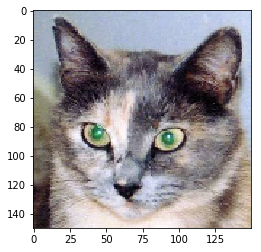

In [40]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [41]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [42]:
#outpur of first layer
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


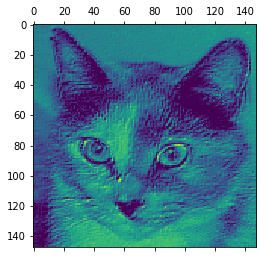

In [43]:
#plot of output of forth channel of thefirst layer
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

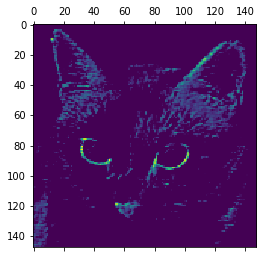

In [22]:
#output 7th channel of first layer
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in divide


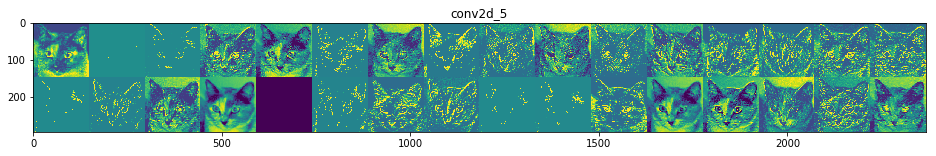

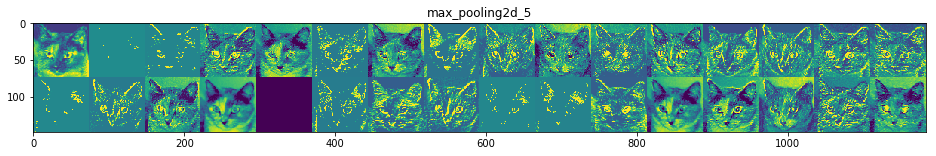

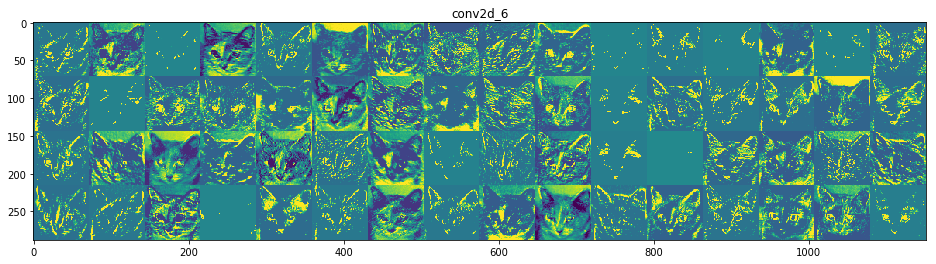

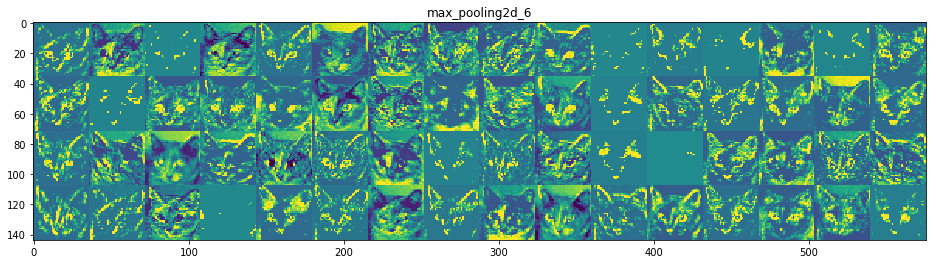

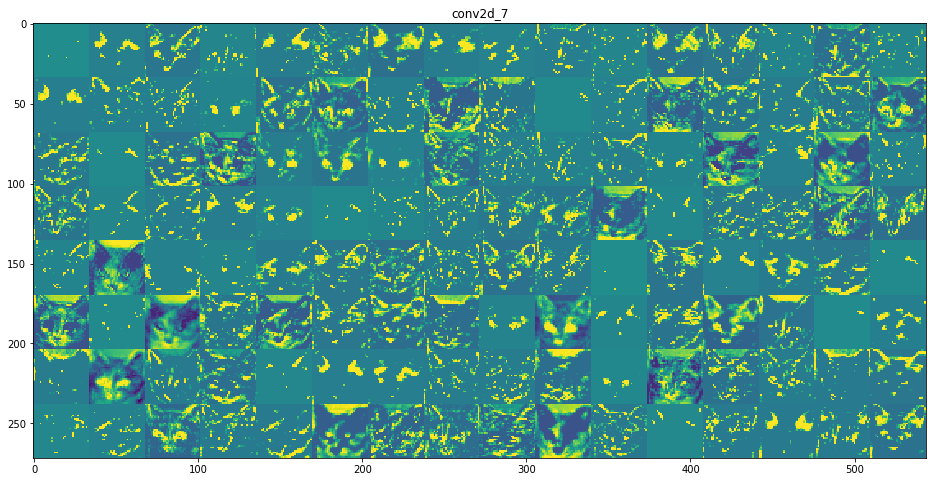

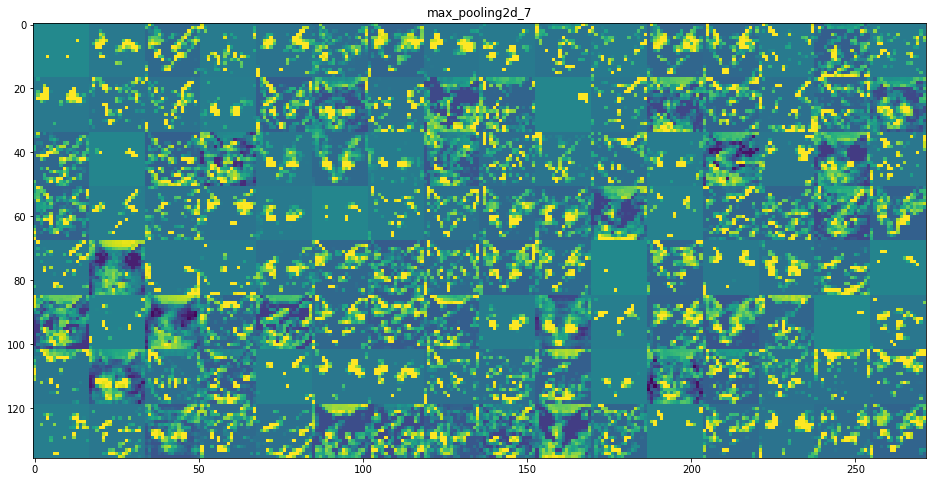

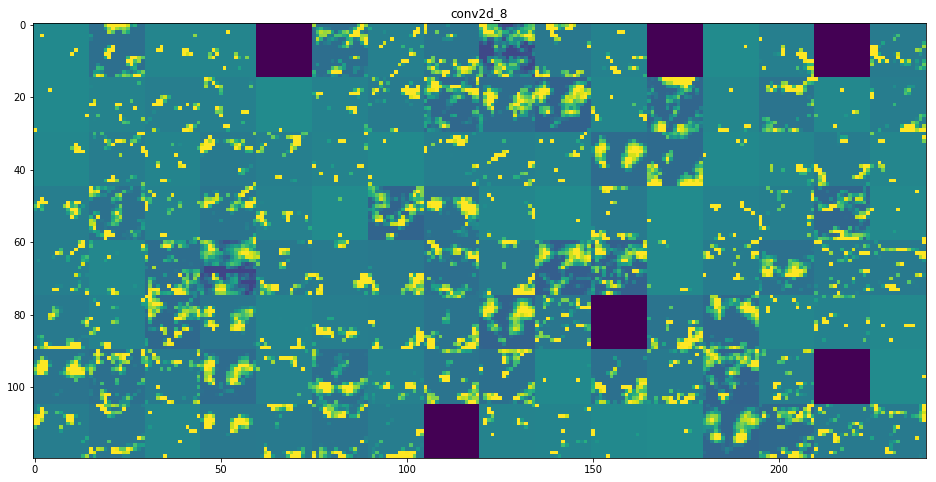

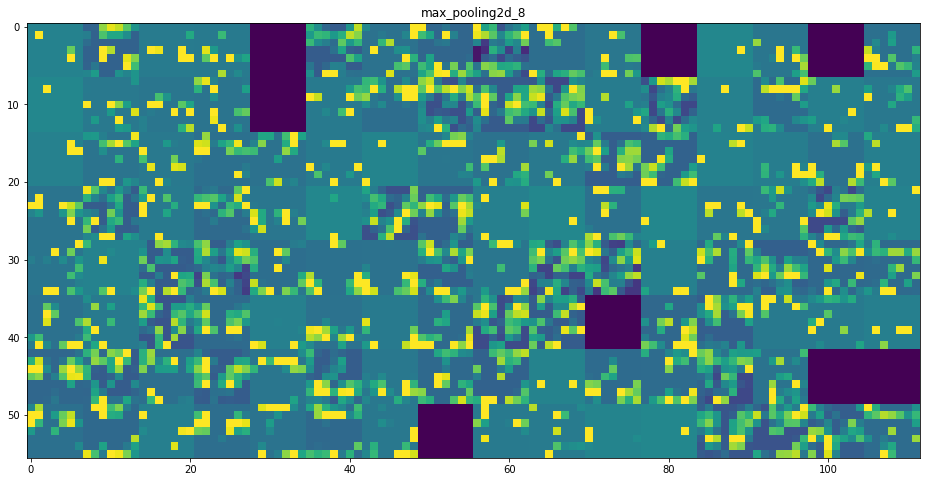

In [44]:
# visualize every intermediate layer
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [2]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


58900480/58889256 [==============================] - 10s 0us/step


In [3]:
grads = K.gradients(loss, model.input)[0]

In [4]:
#grad normalization
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [5]:
#fetching numpy output
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [6]:
#loss maximization via grad descent
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [16]:
#utility to convert a tensor to a valid image
def deprocess_image(x):
    x -= np.amin(x)
    x /= np.amax(x) - np.amin(x)
    # convert to RGB array

    return x

In [17]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

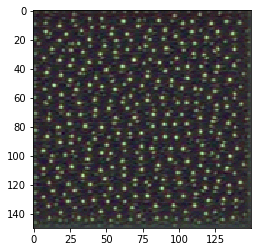

In [18]:
from matplotlib import pyplot as plt
plt.imshow(generate_pattern('block3_conv1', 0))

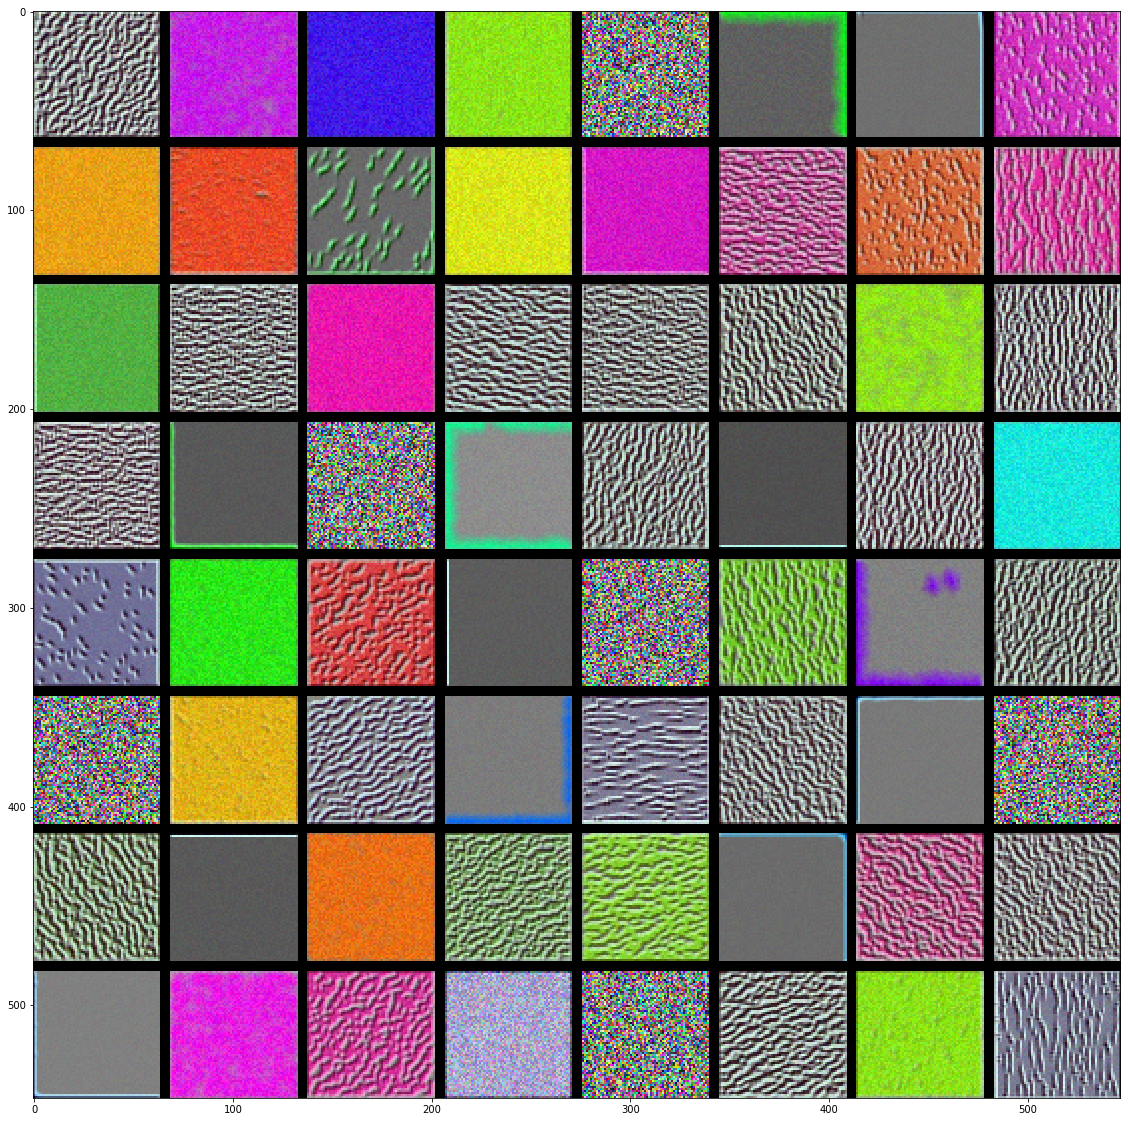

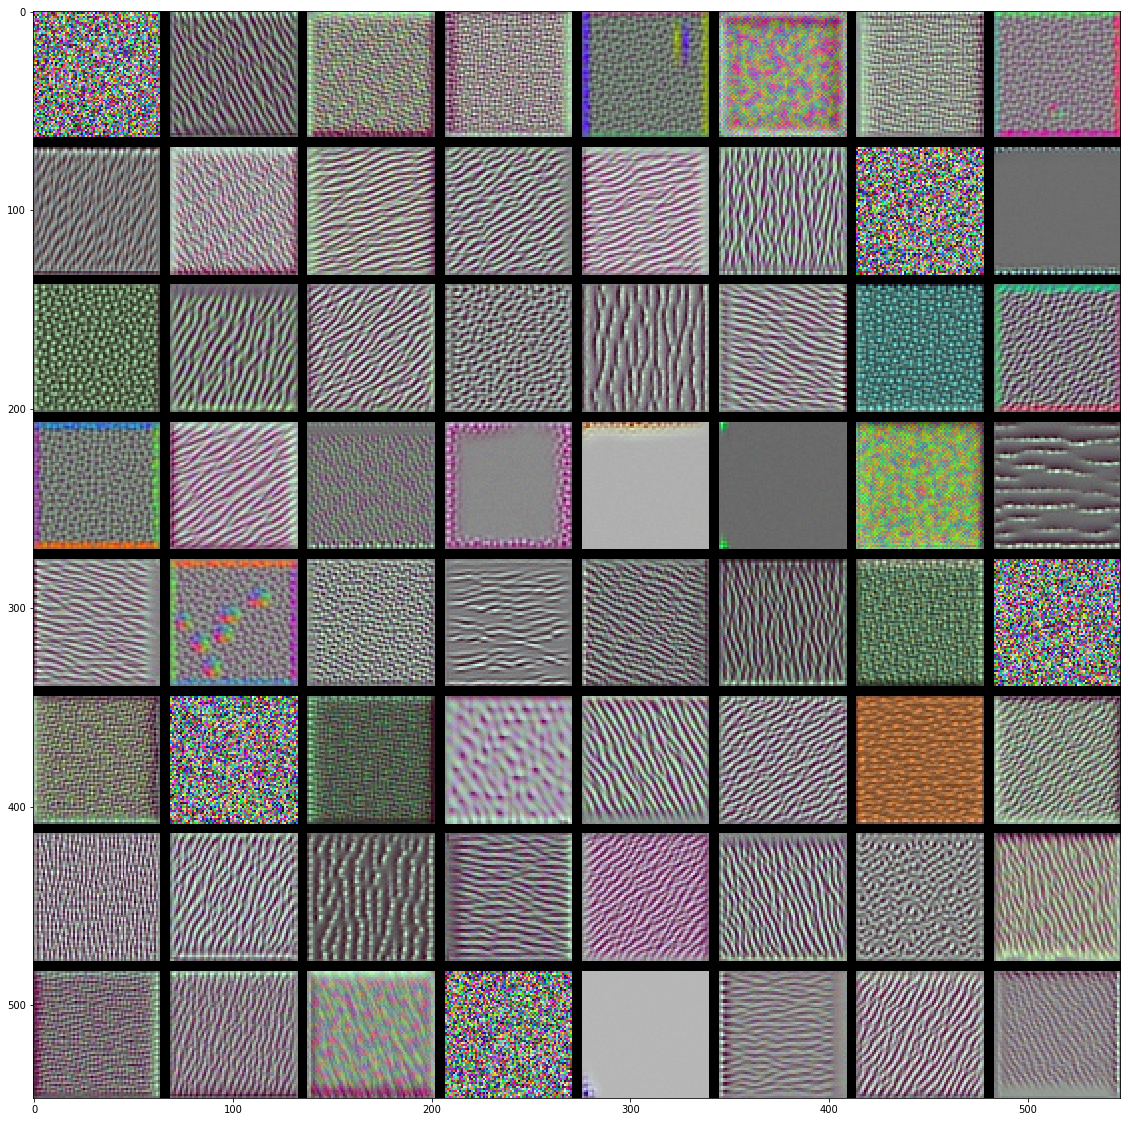

In [ ]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

In [37]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = 'elephants.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [38]:
preds = model.predict(x)

In [39]:
print('Predicted:', decode_predictions(preds, top=3)[0])

('Predicted:', [(u'n02504458', u'African_elephant', 0.8089151), (u'n01871265', u'tusker', 0.1693726), (u'n02504013', u'Indian_elephant', 0.021365492)])


In [40]:
#Find class with highest activation
np.argmax(preds[0])

386

In [41]:
#elephant predictor in activation, output feature map of block5_con3 layer
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')

In [42]:
from keras import backend as K
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

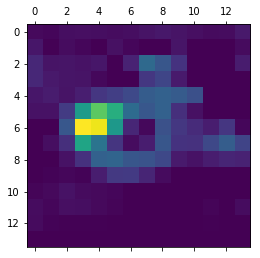

In [43]:
#heatmap post processing
import matplotlib.pyplot as plt
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

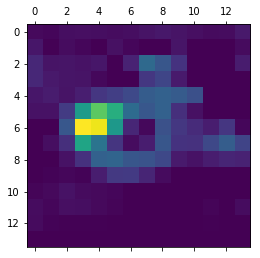

In [33]:
plt.matshow(heatmap)

In [47]:
#super impose heatmap with original pic
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('elephant_cam.jpg', superimposed_img)

True

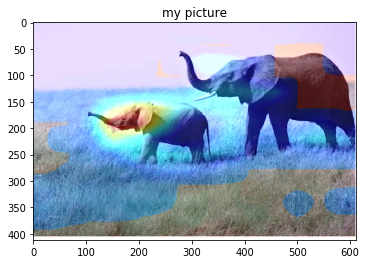

In [4]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('elephant_cam.jpg')

plt.imshow(img)
plt.title('my picture')
plt.show()